In [1]:
#dependencies
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt



#Part 1: Prepare the data

In [2]:
#load data
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#delete MYOPIC column
df_myopia = df.drop(columns=["MYOPIC"])
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
#Standardize dataset so that columns that contain larger values o not influence the outcome more than columns with smaller values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia)

#Part 2: Apply Dimensionality Reduction

In [5]:
#initialize pca
pca = PCA(n_components=0.9)
#get principal components for the data
myopia_pca = pca.fit_transform(scaled_data) 
#fetch explained variance
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [6]:
#reduce dataset dimensions with t-SNE
#initialize t-SNE model
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(myopia_pca)
tsne_features.shape

c:\Users\Hahyk\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

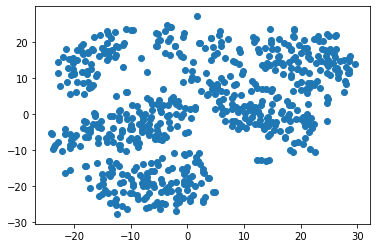

In [7]:
#create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

#Part 3: Perform a cluster analysis with k-means

c:\Users\Hahyk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


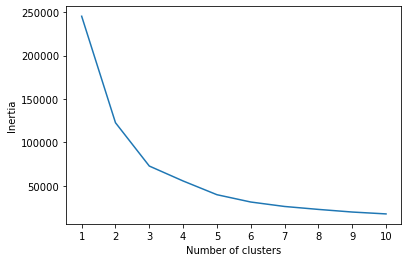

In [8]:
#create an elbow plot to identify best number of clusters

#determine inertia for each k between 1 through 10
inertia = [] 
k = list(range(1,11))

# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#Part 4: Make a recommendation
Based on the t-SNE and elbow plot using k-means, the patients can be clustered in distinct groups of 3-5.